In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

36292


In [161]:
import pandas as pd
smFISH_summary = pd.read_csv(r'\\crick\Shiwei_Crick_4\Analyzed_Data\20211216-P_brain_CTP12-RNA\SummaryDataFrame.csv')
smFISH_summary = smFISH_summary.set_index('id')
smFISH_summary

volume  center_z     center_x    center_y  min_z  max_z     min_x  \
id                                                                             
1        118401.0 -1.023518 -3879.762267 -759.841891  -5.75   4.75 -3882.628   
2        111380.0 -1.421876 -3882.699368 -770.685818  -5.75   4.25 -3885.868   
3         85947.0 -1.484438 -3877.243364 -802.575826  -5.75   3.50 -3881.332   
4         17671.0 -2.826099 -3885.406829 -821.016591  -5.50   0.25 -3886.840   
5         84661.0 -0.855474 -3885.009570 -833.268456  -5.25   4.00 -3888.136   
...           ...       ...          ...         ...    ...    ...       ...   
2100091   27660.0  1.912816  4111.231154   14.708484  -1.25   5.00  4108.680   
2100092   29170.0  2.992201  4000.665253  -90.985397  -1.00   6.25  3998.628   
2100093   24986.0  2.121988  4033.018315  -83.804887  -1.00   5.00  4030.164   
2100094   16317.0  2.306751  4002.690480 -191.273220  -0.75   5.50  4000.896   
2100097   19415.0  3.236595  4117.167960  -76.131579  -0.25   6.25  4113.756   

            max_x    min_y    max_y  n_genes_by_counts  total_counts  leiden  
id                                                                            
1       -3875.608 -764.696 -755.408                  5          14.0       4  
2       -3878.848 -775.496 -765.668                 10          36.0       4  
3       -3872.908 -805.520 -799.472                 10          46.0       4  
4       -3883.600 -824.312 -818.264                  6          16.0       4  
5       -3880.900 -837.488 -827.768                 14          46.0       4  
...           ...      ...      ...                ...           ...     ...  
2100091  4113.972   12.412   16.192                  3         380.0       1  
2100092  4003.920  -94.184  -87.704                  9         265.0      11  
2100093  4035.672  -88.460  -80.684                 12         598.0       1  
2100094  4004.568 -193.544 -189.332                  3         243.0       1  
2100097  4120.668  -78.740  -73.988                 11         309.0       1  

[20431 rows x 13 columns]

## try loading DNA

In [13]:
import pandas as pd
codebook_filename = r'\\10.245.74.212\Chromatin_NAS_2\Chromatin_Libraries\CTP-11_brain\Summary_tables\CTP11-mouse-genome-1000_codebook.csv'
#
codebook_df = pd.read_csv(codebook_filename, header=0)
codebook = np.array(codebook_df[[_name for _name in codebook_df.columns if 'NDB_' in _name]])
codebook_df

name    id  NDB_784  NDB_755  NDB_826  NDB_713  NDB_865  \
0        1:3740000-3760000     1        0        0        0        0        0   
1        1:6240000-6260000     2        0        0        0        0        0   
2        1:8740000-8760000     3        0        0        0        0        0   
3      1:11240000-11260000     4        0        0        0        0        0   
4      1:13740000-13760000     5        0        0        0        0        0   
..                     ...   ...      ...      ...      ...      ...      ...   
983  X:161240000-161260000  1057        0        0        1        0        0   
984  X:163740000-163760000  1058        0        0        0        0        0   
985  X:166240000-166260000  1059        0        0        0        0        0   
986  X:168740000-168760000  1060        0        0        0        0        0   
987      Y:1240000-1260000  1062        0        0        0        0        0   

     NDB_725  NDB_817  NDB_710  ...  NDB_824  NDB_712  NDB_818  NDB_940  \
0          0        0        0  ...        0        0        0        0   
1          0        0        0  ...        0        0        0        0   
2          0        0        0  ...        0        0        0        0   
3          0        0        0  ...        0        0        0        1   
4          0        0        0  ...        0        0        1        0   
..       ...      ...      ...  ...      ...      ...      ...      ...   
983        0        0        0  ...        0        0        0        0   
984        0        0        0  ...        0        0        0        0   
985        1        0        0  ...        0        0        0        0   
986        0        0        0  ...        0        0        0        0   
987        0        0        1  ...        0        0        0        0   

     NDB_872  NDB_934  NDB_926  NDB_910  chr  chr_order  
0          0        0        0        0    1          0  
1          0        0        0        0    1          1  
2          0        0        0        0    1          2  
3          0        0        0        0    1          3  
4          0        0        0        0    1          4  
..       ...      ...      ...      ...  ...        ...  
983        0        1        0        0    X         52  
984        1        0        0        0    X         53  
985        0        0        0        0    X         54  
986        0        0        0        0    X         55  
987        0        0        0        0    Y          0  

[988 rows x 103 columns]

In [14]:
decode_folder = r'\\crick\SSD_1\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Decoder'

decode_files = [os.path.join(decode_folder, _fl) for _fl in os.listdir(decode_folder) 
                if _fl.split(os.path.extsep)[-1]=='pkl']

In [57]:
reload(decode)

<module 'ImageAnalysis3.classes.decode' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\classes\\decode.py'>

In [59]:
%%time
import multiprocessing as mp
load_args = [(_fl, 'chr_2_zxys_list') for _fl in decode_files[:]]
print(len(load_args))
with mp.Pool(44) as load_pool:
    all_chr_2_zxys_list = load_pool.starmap(decode.batch_load_attr, 
                                            load_args, chunksize=1)
    load_pool.close()
    load_pool.join()
    load_pool.terminate()

all_chr_2_zxys_list = [_item for _item in all_chr_2_zxys_list if _item is not None]
print(len(all_chr_2_zxys_list))

6823
6822
Wall time: 2min 29s


In [127]:
fov_id, cell_id

(3, 100)

In [122]:
decode_files.index(r'')

['\\\\crick\\SSD_1\\Pu_Temp\\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\\Decoder\\Conv_zscan_003_Cell-100_Decoder.pkl',
 '\\\\crick\\SSD_1\\Pu_Temp\\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\\Decoder\\Conv_zscan_003_Cell-101_Decoder.pkl',
 '\\\\crick\\SSD_1\\Pu_Temp\\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\\Decoder\\Conv_zscan_003_Cell-102_Decoder.pkl',
 '\\\\crick\\SSD_1\\Pu_Temp\\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\\Decoder\\Conv_zscan_003_Cell-103_Decoder.pkl',
 '\\\\crick\\SSD_1\\Pu_Temp\\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\\Decoder\\Conv_zscan_003_Cell-104_Decoder.pkl',
 '\\\\crick\\SSD_1\\Pu_Temp\\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\\Decoder\\Conv_zscan_003_Cell-105_Decoder.pkl',
 '\\\\crick\\SSD_1\\Pu_Temp\\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\\Decoder\\Conv_zscan_003_Cell-107_Decoder.pkl',
 '\\\\crick\\SSD_1\\Pu_Temp\\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\\Decoder\\Conv_zscan_003_Cell-108_Decoder.pkl',


In [60]:
%%time
import multiprocessing as mp

summary_args = [(_item, codebook_df) for _item in all_chr_2_zxys_list ]

with mp.Pool(44) as summary_pool:
    all_zxys_list = summary_pool.starmap(decode.DNA_Merfish_Decoder.summarize_zxys_by_regions, 
                                         summary_args, chunksize=1)
    summary_pool.close()
    summary_pool.join()
    summary_pool.terminate()

Wall time: 12min 11s


In [61]:
all_zxys_list = np.concatenate(all_zxys_list)

In [64]:
from scipy.spatial.distance import cdist,pdist,squareform


In [65]:
from tqdm import tqdm

In [66]:
all_distmaps = [squareform(pdist(_zxys)) for _zxys in tqdm(all_zxys_list)]

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 13644/13644 [04:56<00:00, 45.98it/s]


In [67]:
median_distmap = np.nanmedian(all_distmapsaps, axis=0)

In [86]:
figure_folder = r'\\crick\SSD_1\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Figures'

In [105]:
_ordered_chr_names = []
for _chr_name, _chr_reg_id in zip(codebook_df['chr'], codebook_df['chr_order']):
    if _chr_name not in _ordered_chr_names:
        _ordered_chr_names.append(_chr_name)
chr_2_indices = {_chr:np.array(codebook_df.loc[codebook_df['chr']==_chr].index)
                for _chr in np.unique(codebook_df['chr'].values)}

In [111]:
_labels_edges = np.array([0] + [np.max(chr_2_indices[_chr]) for _chr in _ordered_chr_names])

E:\Users\puzheng\AppData\anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


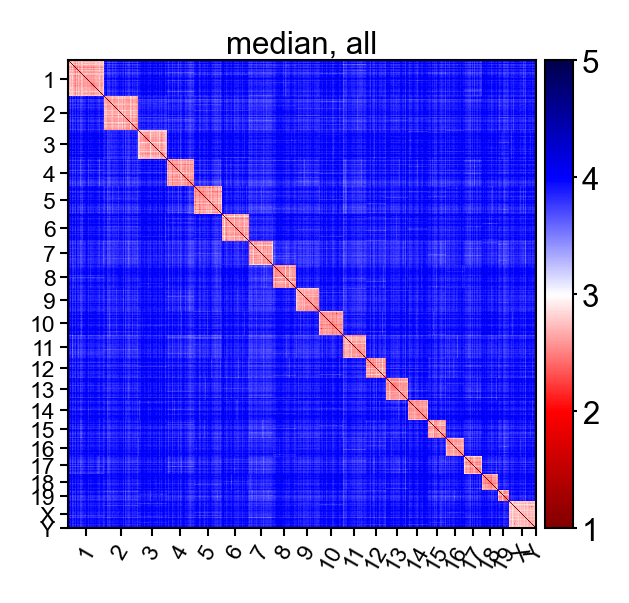

In [244]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(3,2), dpi=300)

ia.figure_tools.distmap.plot_distance_map(median_distmap, color_limits=[1,5],
                                          ax=ax,
                                          )
ax.set_title('median, all', fontsize=7.5, pad=2)

ax.set_xticks((_labels_edges[1:] + _labels_edges[:-1])/2)
ax.set_xticklabels(_ordered_chr_names, fontsize=5.5, rotation=60,)
ax.set_yticks((_labels_edges[1:] + _labels_edges[:-1])/2)
ax.set_yticklabels(_ordered_chr_names, fontsize=5.5, )

plt.gcf().subplots_adjust(bottom=0.1, left=0.1, right=0.9,)

fig.savefig(os.path.join(figure_folder, 'all_median_distmap.png'), transparent=True)
fig.show()

In [222]:
len(all_distmaps)
len(sel_)

13644

In [223]:
len(all_zxys_list)

13644

In [224]:
cell_ids = []

for _fl in decode_files:
    if '003_Cell-6' in _fl:
        continue
    
    fov_id = int(_fl.split('Conv_zscan_')[1].split('_')[0])
    cell_id = int(_fl.split('Cell-')[1].split('_')[0])
    cell_ids.append(fov_id * 10000 + cell_id)
    

sel_distmaps = []
sel_cell_ids = []
for _i, _cell_id in enumerate(cell_ids):
    if _cell_id not in smFISH_summary.index:
        print(_cell_id)
    else:
        sel_distmaps.append(all_distmaps[_i*2])
        sel_distmaps.append(all_distmaps[_i*2+1])
        sel_cell_ids.append(_cell_id)
        sel_cell_ids.append(_cell_id)
sel_distmaps = np.array(sel_distmaps, dtype=np.float32)

30102
30126
30001
30092
40124
40126
40129
40131
40142
40143
40153
40164
40174
40175
40179
40180
40201
40206
40207
40208
40215
40218
50100
50104
50108
50110
50135
50138
50143
50014
50160
50161
50167
50172
50055
50068
50077
50097
60107
60017
60021
60048
70131
70036
70084
70098
70009
80112
80122
80068
90100
90101
100091
110165
110094
120100
130098
140103
160077
180051
180078
180083
200157
200088
210008
220063
250023
270025
270063
270068
280021
280031
300030
310056
340080
360069
370096
400107
400057
400087
420084
450024
450073
450080
450081
480040
480044
500031
500033
580022
580024
580027
580034
580039
580043
580047
580050
580055
600042
600045
600050
600054
610079
620143
630143
630086
640146
640002
650104
650106
650108
650010
650110
650116
650117
650118
650122
650128
650130
650137
650140
650145
650150
650151
650153
650154
650158
650163
650164
650165
650166
650167
650170
650171
650176
650180
650181
650185
650186
650187
650190
650196
650204
650211
650043
650051
650053
650054
650056
650057
65

In [226]:
len(sel_cell_ids)

13250

In [202]:
cell_df = smFISH_summary.loc[sel_cell_ids,:]
cell_df

volume  center_z     center_x    center_y  min_z  max_z     min_x  \
id                                                                            
30100    96310.0 -0.394110 -3867.463070 -644.707391  -4.00   3.75 -3871.736   
30101   112905.0  1.843610 -3810.615232 -749.055405  -4.00   6.25 -3814.172   
30103   109806.0  1.744987 -3770.369164 -674.550317  -3.50   6.25 -3773.888   
30104   106290.0  1.688849 -3820.635413 -772.965664  -3.25   6.25 -3824.432   
30105    65118.0  1.677447 -3737.604720 -741.796176  -3.25   6.25 -3740.408   
...          ...       ...          ...         ...    ...    ...       ...   
800012   87904.0 -2.077741 -3247.647024  822.635104  -6.25   2.75 -3251.692   
800019   34878.0 -3.287603 -3224.651714  931.489648  -6.25   0.50 -3227.176   
800026  366499.0  0.265748 -3197.952506  931.658961  -6.25   6.25 -3203.848   
800027   55240.0 -3.420574 -3196.964318  909.558505  -6.25   1.00 -3201.364   
800036  112517.0 -1.812784 -3157.646261  918.677893  -6.25   3.25 -3160.864   

           max_x    min_y    max_y  n_genes_by_counts  total_counts  leiden  
id                                                                           
30100  -3863.312 -649.044 -640.296                 12         151.0       6  
30101  -3806.180 -752.832 -744.408                 11          57.0       0  
30103  -3766.652 -678.312 -671.076                 12         218.0       0  
30104  -3816.980 -776.592 -768.924                  5          14.0       5  
30105  -3734.144 -745.596 -738.576                  9          67.0       7  
...          ...      ...      ...                ...           ...     ...  
800012 -3243.700  818.932  825.736                 12         142.0       7  
800019 -3221.668  929.308  933.844                  8         112.0       6  
800026 -3191.860  926.068  937.840                 20         623.0       3  
800027 -3193.372  904.036  913.864                 19         488.0       9  
800036 -3154.600  914.296  923.044                 18         370.0       6  

[6625 rows x 13 columns]

In [229]:
class_2_distmap = {}

for _cell_id, _distmap in zip(sel_cell_ids, sel_distmaps):
    _class = smFISH_summary.loc[_cell_id, 'leiden']
    if _class not in class_2_distmap:
        class_2_distmap[_class] = [_distmap]
    else:
        class_2_distmap[_class].append(_distmap)
        

In [230]:
from ImageAnalysis3.classes import postanalysis
reload(postanalysis)

class_2_median_distmap = {}
for _class in class_2_distmap:
    print(_class)
    class_2_median_distmap[_class] = postanalysis.parallel_reduce_matrix(class_2_distmap[_class],
                                                                         function='nanmedian', num_threads=44)
    #np.nanmedian(class_2_distmap[_class], axis=0)
    

6
0
5
7
4
12
8
3
2
11
1
10
9
13


In [242]:
1-np.mean(np.isnan(all_zxys_list).any(2))

0.8210736400571146

E:\Users\puzheng\AppData\anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


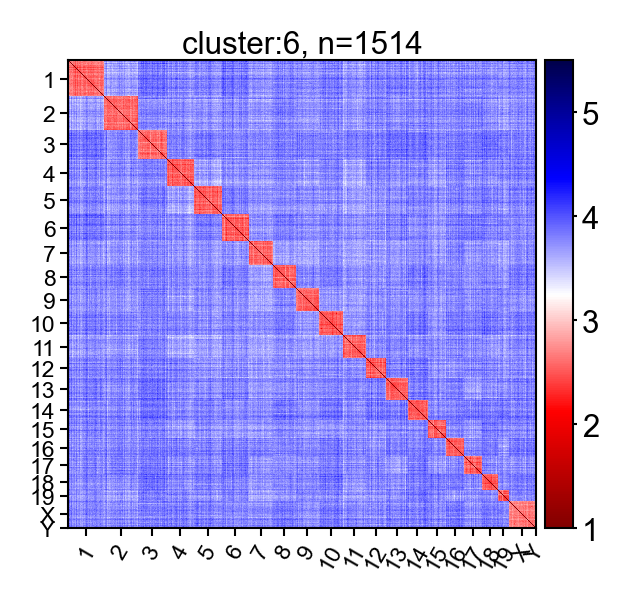

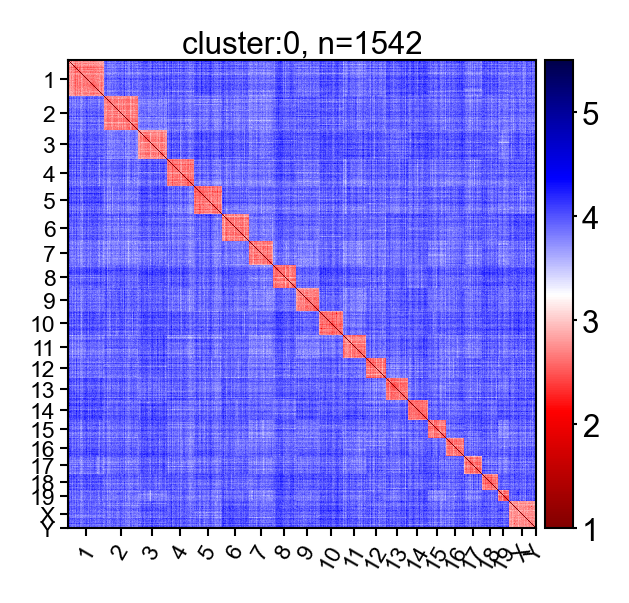

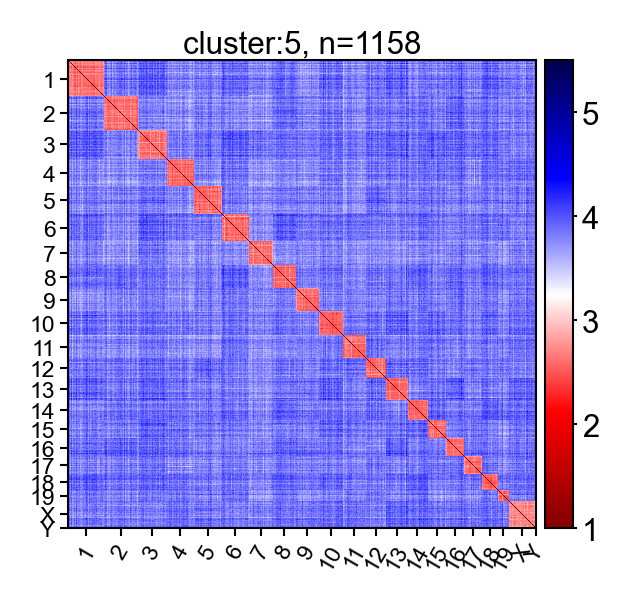

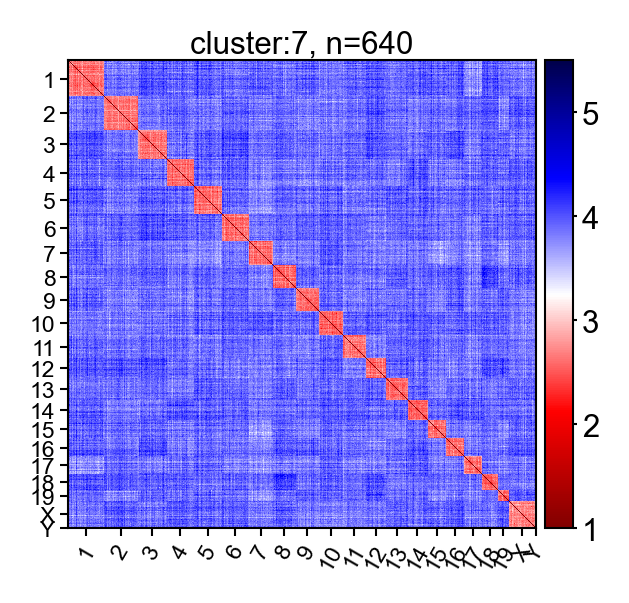

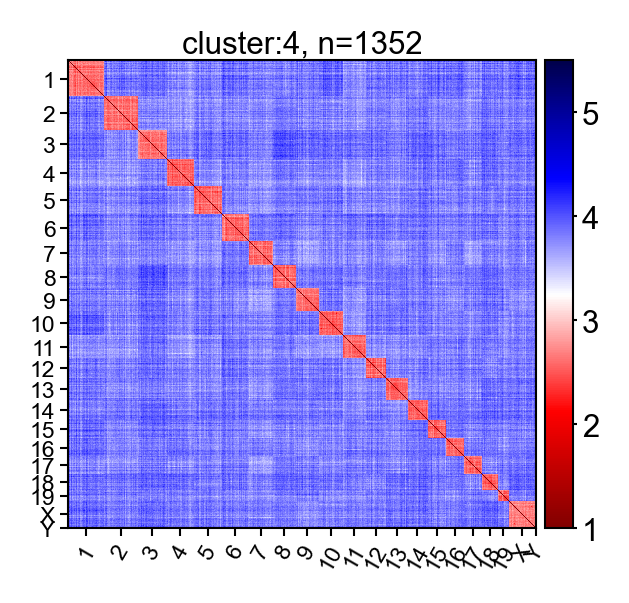

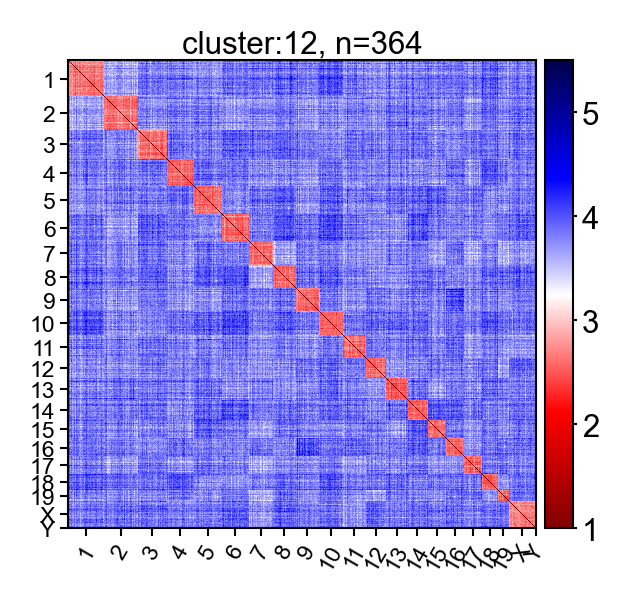

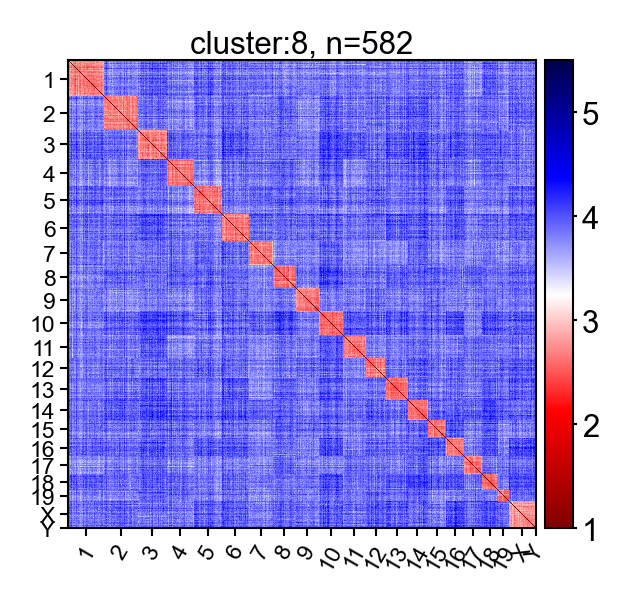

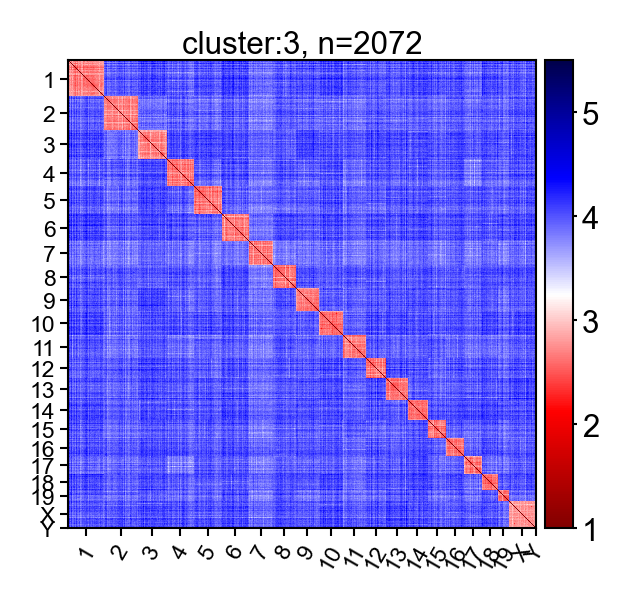

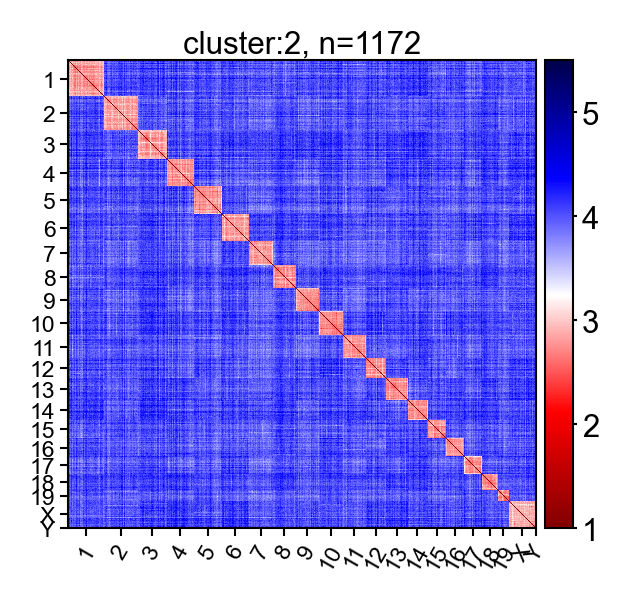

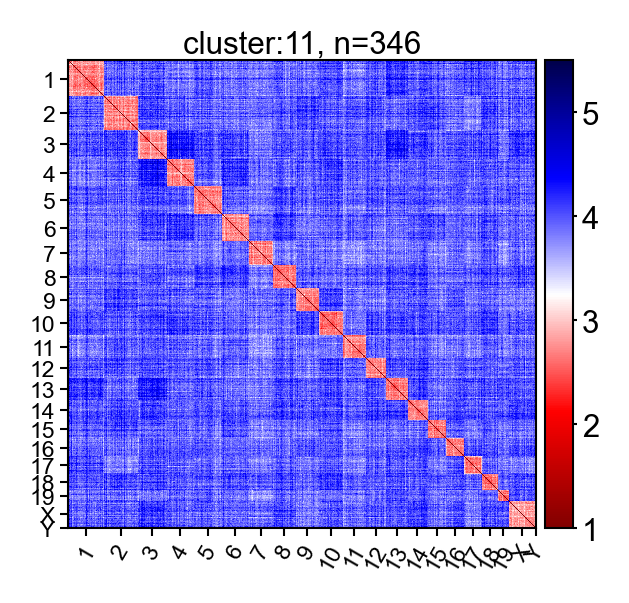

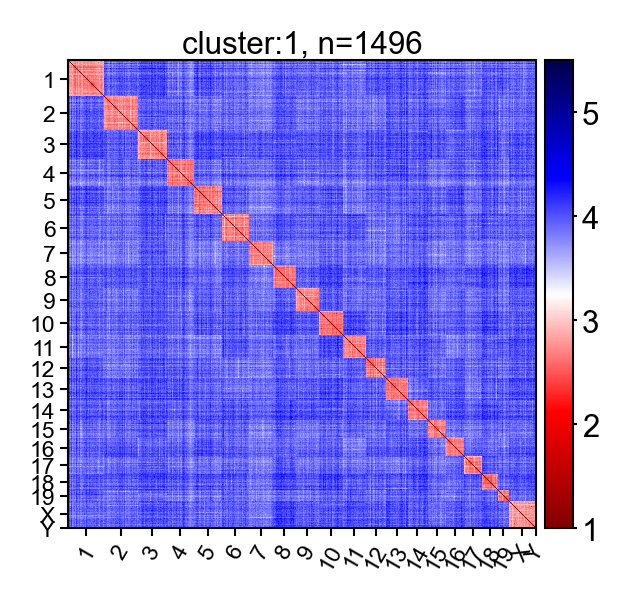

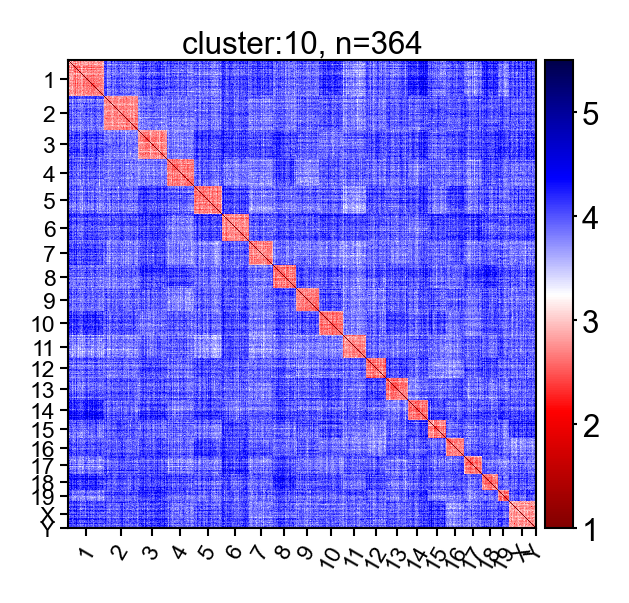

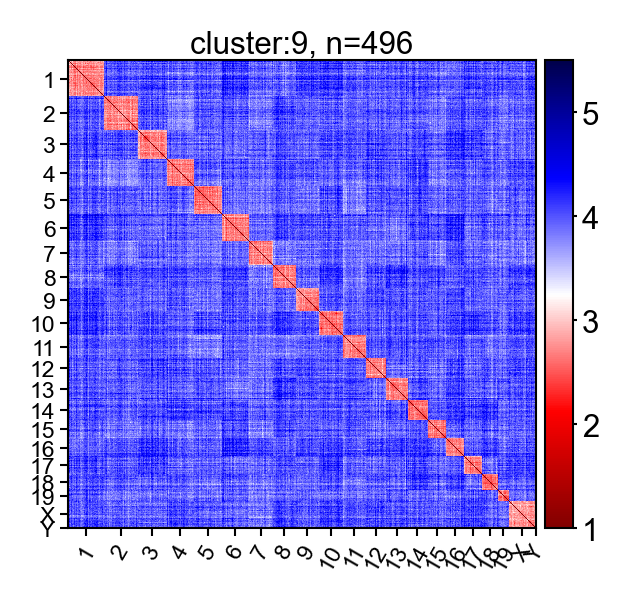

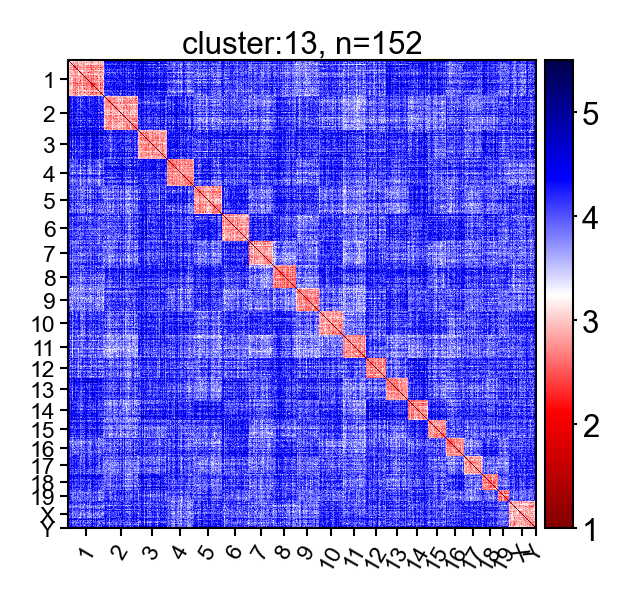

In [245]:
%matplotlib inline

for _class, _distmap in class_2_median_distmap.items():
    # 
    fig, ax = plt.subplots(figsize=(3,2), dpi=300)

    ia.figure_tools.distmap.plot_distance_map(_distmap.astype(np.float32), color_limits=[1,5.5],
                                              ax=ax,
                                              )
    ax.set_title(f"cluster:{_class}, n={len(class_2_distmap[_class])}", fontsize=7.5, pad=2)

    ax.set_xticks((_labels_edges[1:] + _labels_edges[:-1])/2)
    ax.set_xticklabels(_ordered_chr_names, fontsize=5.5, rotation=60,)
    ax.set_yticks((_labels_edges[1:] + _labels_edges[:-1])/2)
    ax.set_yticklabels(_ordered_chr_names, fontsize=5.5, )

    plt.gcf().subplots_adjust(bottom=0.1, left=0.1, right=0.9,)

    fig.savefig(os.path.join(figure_folder, f'median_distmap_cluster_{_class}.png'), transparent=True)
    fig.show()
    
    

array([[0.        , 2.31648618, 2.44956131, ..., 2.77473112, 2.69386769,
        2.77956202],
       [2.31648618, 0.        , 2.37724108, ..., 2.76832776, 2.66477351,
        2.77128334],
       [2.44956131, 2.37724108, 0.        , ..., 2.7347504 , 2.57587628,
        2.68056768],
       ...,
       [2.77473112, 2.76832776, 2.7347504 , ..., 0.        , 2.69790446,
        2.87748185],
       [2.69386769, 2.66477351, 2.57587628, ..., 2.69790446, 0.        ,
        2.44749645],
       [2.77956202, 2.77128334, 2.68056768, ..., 2.87748185, 2.44749645,
        0.        ]])

E:\Users\puzheng\AppData\anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


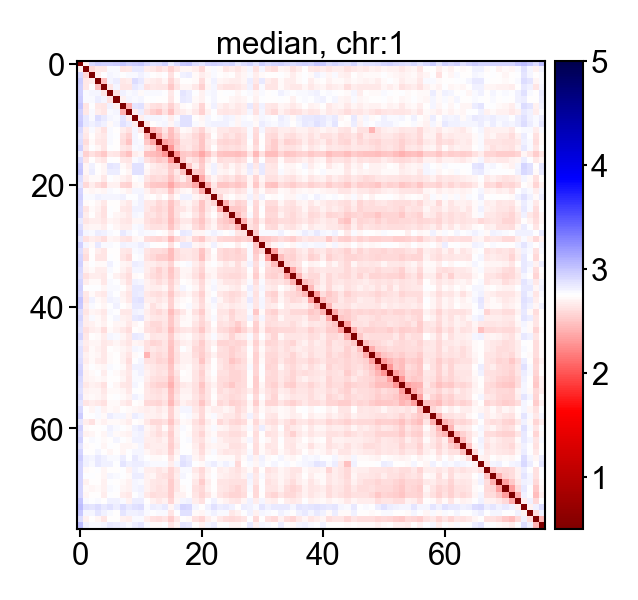

In [260]:
%matplotlib inline

chr_name = '1'

fig, ax = plt.subplots(figsize=(3,2), dpi=300)

ia.figure_tools.distmap.plot_distance_map(median_distmap[:,chr_2_indices[chr_name]][chr_2_indices[chr_name]], 
                                          color_limits=[0.5,5],
                                          ax=ax,
                                          )
ax.set_title(f"median, chr:{chr_name}", fontsize=7.5, pad=2)

#ax.set_xticks((_labels_edges[1:] + _labels_edges[:-1])/2)
#ax.set_xticklabels(_ordered_chr_names, fontsize=5.5, rotation=60,)
#ax.set_yticks((_labels_edges[1:] + _labels_edges[:-1])/2)
#ax.set_yticklabels(_ordered_chr_names, fontsize=5.5, )

plt.gcf().subplots_adjust(bottom=0.1, left=0.1, right=0.9,)

#fig.savefig(os.path.join(figure_folder, 'all_median_distmap.png'), transparent=True)
fig.show()

In [101]:
decode

<module 'ImageAnalysis3.classes.decode' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\classes\\decode.py'>

In [277]:
reload(decode)


<module 'ImageAnalysis3.classes.decode' from 'E:\\Users\\puzheng\\Documents\\ImageAnalysis3\\classes\\decode.py'>

In [15]:

from ImageAnalysis3.classes.preprocess import Spots3D, SpotTuple
from ImageAnalysis3.classes import decode
for _fl in decode_files[:]:
    _spot_fl = _fl.replace('Decoder', 'CandSpots')
    cand_spots_dict = pickle.load(open(_spot_fl, 'rb'))
    cand_spots_list = []
    for _i in np.arange(1, codebook.shape[1]+1):
        if _i in cand_spots_dict:
            cand_spots_list.append(Spots3D(cand_spots_dict[_i], bits=_i))
        else:
            cand_spots_list.append([])

    _decoder = decode.DNA_Merfish_Decoder(cand_spots_list, codebook_df, savefile=_fl)
    
    
    break

- Loading decoder into file: \\crick\SSD_1\Pu_Temp\20211220-P_brain_CTP11-1000_CTP12-DNA_from_1216\Decoder\Conv_zscan_003_Cell-100_Decoder.pkl


In [30]:
total_zxys = summarize_zxys_by_regions(_decoder, )

In [31]:
total_zxys[0].shape

(988, 3)

In [275]:
_decoder.bits

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [276]:
_decoder.bit_ids

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [274]:
_decoder.valid_pair_bits

[(37, 63),
 (37, 78),
 (63, 78),
 (18, 43),
 (18, 87),
 (43, 87),
 (35, 73),
 (35, 83),
 (73, 83),
 (58, 59),
 (58, 95),
 (59, 95),
 (42, 79),
 (42, 94),
 (79, 94),
 (62, 66),
 (62, 81),
 (66, 81),
 (67, 75),
 (67, 84),
 (75, 84),
 (24, 45),
 (24, 55),
 (45, 55),
 (5, 46),
 (5, 91),
 (46, 91),
 (52, 65),
 (52, 76),
 (65, 76),
 (13, 68),
 (13, 70),
 (68, 70),
 (16, 44),
 (16, 69),
 (44, 69),
 (31, 32),
 (31, 63),
 (32, 63),
 (11, 23),
 (11, 48),
 (23, 48),
 (6, 7),
 (6, 14),
 (7, 14),
 (4, 36),
 (4, 50),
 (36, 50),
 (40, 85),
 (40, 89),
 (85, 89),
 (9, 21),
 (9, 57),
 (21, 57),
 (25, 33),
 (25, 56),
 (33, 56),
 (19, 30),
 (19, 74),
 (30, 74),
 (54, 90),
 (54, 92),
 (90, 92),
 (8, 15),
 (8, 64),
 (15, 64),
 (1, 38),
 (1, 82),
 (38, 82),
 (71, 96),
 (71, 98),
 (96, 98),
 (27, 29),
 (27, 61),
 (29, 61),
 (12, 69),
 (12, 75),
 (69, 75),
 (22, 57),
 (22, 86),
 (57, 86),
 (55, 84),
 (55, 88),
 (84, 88),
 (3, 77),
 (3, 80),
 (77, 80),
 (49, 52),
 (49, 97),
 (52, 97),
 (9, 45),
 (9, 66),
 (45, 